In [27]:
import numpy as np

def A_matrix(n):
    A = np.zeros((n-1, n-1))
    for i in range(0, len(A)):
        for j in range(len(A[i])):
            if j == i - 1:
                A[i][j] = 1
            elif j == i:
                A[i][j] = -2
            elif j == i + 1:
                A[i][j] = 1
            else:
                A[i][j] = 0

    return A

def M_matrix(n):
    M = np.zeros((n-1, n-1))
    for i in range(0, len(M)):
        for j in range(len(M[i])):
            if j == i - 1:
                M[i][j] = 1
            elif j == i:
                M[i][j] = 4
            elif j == i + 1:
                M[i][j] = 1
            else:
                M[i][j] = 0

    return M


In [2]:
import numpy as np

def u_exact(x, t, a, b, T):
    L = b-a
    u_e = np.sin(np.pi*x/L)*np.cos(np.pi*t/T)

    return u_e



def g_function(x, t, a, b, T, c_squared):
    
    L = b-a

    g = np.sin(np.pi*x/L)*np.cos(np.pi*t/T)*(c_squared*a**2*np.pi**2/(L**2) - b**2*np.pi**2/(T**2))

    return g


def ibvp_step(x, state, n, deltat, deltax, tk, a, b, A, M, I, c_squared, T):
    
    u = state[0]
    v = state[1]

    gt = g_function(x, tk, a, b, T, c_squared)
    
    gt1 = g_function(x, tk+deltat, a, b, T, c_squared)

    M_inv = np.linalg.inv(M)

    uplus = v
    vplus = np.linalg.solve(I - 1/2*deltat*(c_squared/deltax)*6/deltax*M_inv@A, u + 6/deltax*M_inv@(1/2*deltat*((c_squared/deltax)*(A@u) + gt + gt1)) )
    
    return uplus, vplus
    

def solve_ibvp(state_initial, deltat, deltax, T, a, b, c_squared):
    n = int(abs((b-a)/deltax))
    nt = int(abs(T/deltat))
    x = np.linspace(a+deltax, b-deltax, num=n-1)
    t = np.linspace(0, T, num=nt+1)
    A = A_matrix(n)
    M = M_matrix(n)
    I = np.identity(n-1)
    
    uhat = [state_initial[0]]
    vhat = [state_initial[1]]
    for h in range(len(t)-1):
        state_hat = np.array([uhat[h], vhat[h]])
        uplus, vplus = ibvp_step(x, state_hat, n, deltat, deltax, t[h], a, b, A, M, I, c_squared, T)
        uhat.append(uplus)
        vhat.append(vplus)
        
    return uhat, vhat, x, t

In [22]:
import numpy as np

a = 0
b = 1
L = b-a
c_squared = 68.9e9 / 2710
deltat = 0.01
deltax = 0.01
T = 1
n = int(abs((b-a)/deltax))
nt = int(abs(T/deltat))
x = np.linspace(a+deltax, b-deltax, num=n-1)

ui = np.sin(np.pi*x/L)
vi = np.zeros((n-1))
initial_state = [ui, vi]


uhat, vhat, x, t = solve_ibvp(initial_state, deltat, deltax, T, a, b, c_squared)



In [23]:
u_true = []

for d in range(len(t)):
    utk = u_exact(x, t[d], a, b, T)
    u_true.append(utk)

u_true = np.array(u_true)

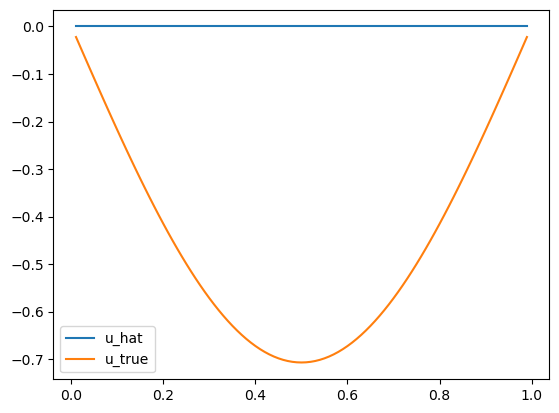

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, uhat[75], label='u_hat')
plt.plot(x, u_true[75], label='u_true')
plt.legend()
plt.show()

#print(uhat)